In [4]:
import numpy  as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt1
%matplotlib inline


In [43]:
data =pd.read_csv('data-Hamburgstation.csv')
data.head()


,date,id,stid,e5,e10,diesel,changed
0,5/1/2016 21:26,1691,51d4b4ff-a095-1aa0-e100-80009459e03a,1259,1239,999,63
1,5/1/2016 23:05,22492,51d4b4ff-a095-1aa0-e100-80009459e03a,1319,1299,1069,21
2,5/2/2016 6:17,33677,51d4b4ff-a095-1aa0-e100-80009459e03a,1299,1279,1049,21
3,5/2/2016 9:57,60370,51d4b4ff-a095-1aa0-e100-80009459e03a,1279,1259,1019,21
4,5/2/2016 11:45,71060,51d4b4ff-a095-1aa0-e100-80009459e03a,1269,1249,1009,21


In [6]:
print(data.dtypes)


date       object
id          int64
stid       object
e5          int64
e10         int64
diesel      int64
changed     int64
dtype: object


In [7]:
print(data.columns)

Index(['date', 'id', 'stid', 'e5', 'e10', 'diesel', 'changed'], dtype='object')


In [8]:
from datetime import datetime
con=data['date']
data['date']=pd.to_datetime(data['date'])
data.set_index('date',inplace=True)
data.index

DatetimeIndex(['2016-05-01 21:26:00', '2016-05-01 23:05:00',
               '2016-05-02 06:17:00', '2016-05-02 09:57:00',
               '2016-05-02 11:45:00', '2016-05-02 12:37:00',
               '2016-05-02 14:17:00', '2016-05-02 15:45:00',
               '2016-05-02 17:45:00', '2016-05-02 23:03:00',
               ...
               '2018-10-10 07:24:00', '2018-10-10 08:23:00',
               '2018-10-10 09:23:00', '2018-10-10 10:23:00',
               '2018-10-10 11:25:00', '2018-10-10 12:47:00',
               '2018-10-10 13:53:00', '2018-10-10 17:10:00',
               '2018-10-10 18:08:00', '2018-10-10 18:56:00'],
              dtype='datetime64[ns]', name='date', length=12136, freq=None)

In [9]:
data.head(100)

,id,stid,e5,e10,diesel,changed
date,,,,,,
2016-05-01 21:26:00,1691,51d4b4ff-a095-1aa0-e100-80009459e03a,1259,1239,999,63
2016-05-01 23:05:00,22492,51d4b4ff-a095-1aa0-e100-80009459e03a,1319,1299,1069,21
2016-05-02 06:17:00,33677,51d4b4ff-a095-1aa0-e100-80009459e03a,1299,1279,1049,21
2016-05-02 09:57:00,60370,51d4b4ff-a095-1aa0-e100-80009459e03a,1279,1259,1019,21
2016-05-02 11:45:00,71060,51d4b4ff-a095-1aa0-e100-80009459e03a,1269,1249,1009,21
2016-05-02 12:37:00,83216,51d4b4ff-a095-1aa0-e100-80009459e03a,1289,1269,1029,21
2016-05-02 14:17:00,99575,51d4b4ff-a095-1aa0-e100-80009459e03a,1269,1249,1009,21
2016-05-02 15:45:00,111744,51d4b4ff-a095-1aa0-e100-80009459e03a,1259,1239,999,21
2016-05-02 17:45:00,122889,51d4b4ff-a095-1aa0-e100-80009459e03a,1259,1239,989,1


In [10]:
data.tail(50)

,id,stid,e5,e10,diesel,changed
date,,,,,,
2018-10-06 17:10:00,138074364,51d4b4ff-a095-1aa0-e100-80009459e03a,1529,1509,1379,21
2018-10-06 18:08:00,138092244,51d4b4ff-a095-1aa0-e100-80009459e03a,1499,1479,1349,21
2018-10-06 18:53:00,138102905,51d4b4ff-a095-1aa0-e100-80009459e03a,1449,1429,1329,21
2018-10-07 06:31:00,138131861,51d4b4ff-a095-1aa0-e100-80009459e03a,1529,1509,1409,21
2018-10-07 07:23:00,138138376,51d4b4ff-a095-1aa0-e100-80009459e03a,1519,1499,1399,21
2018-10-07 08:22:00,138148551,51d4b4ff-a095-1aa0-e100-80009459e03a,1509,1489,1389,21
2018-10-07 09:07:00,138158985,51d4b4ff-a095-1aa0-e100-80009459e03a,1499,1479,1349,21
2018-10-07 09:53:00,138168400,51d4b4ff-a095-1aa0-e100-80009459e03a,1489,1469,1339,21
2018-10-07 11:53:00,138186339,51d4b4ff-a095-1aa0-e100-80009459e03a,1479,1459,1329,21


In [11]:
del data['id']


In [12]:
del data['stid']

In [13]:
del data['e5']

In [14]:
del data['e10']

In [15]:
del data['changed']


In [16]:
data.head()

,diesel
date,
2016-05-01 21:26:00,999
2016-05-01 23:05:00,1069
2016-05-02 06:17:00,1049
2016-05-02 09:57:00,1019
2016-05-02 11:45:00,1009


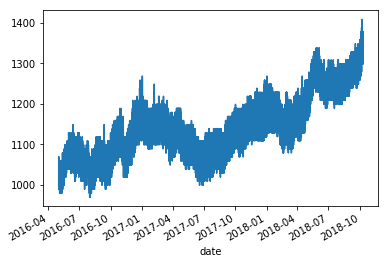

In [17]:
data.diesel.plot()

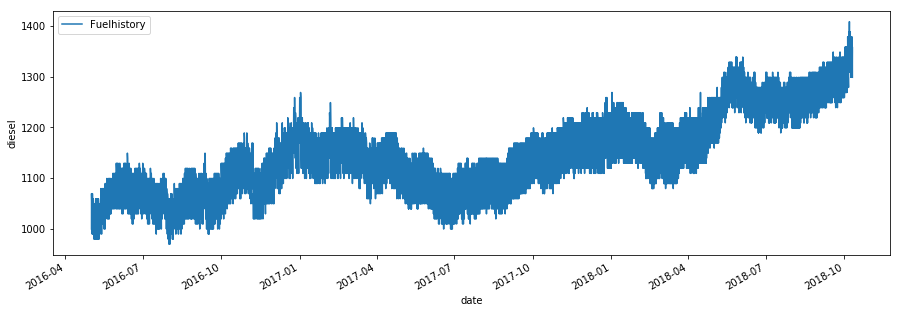

In [18]:
my_plot=data.plot(kind='line',figsize=(15,5))
my_plot.set_xlabel("date")
my_plot.set_ylabel("diesel")
my_plot.legend(["Fuelhistory"])


In [19]:
data.isnull()

,diesel
date,
2016-05-01 21:26:00,False
2016-05-01 23:05:00,False
2016-05-02 06:17:00,False
2016-05-02 09:57:00,False
2016-05-02 11:45:00,False
2016-05-02 12:37:00,False
2016-05-02 14:17:00,False
2016-05-02 15:45:00,False
2016-05-02 17:45:00,False


In [20]:
data.describe()

,diesel
count,12136.000000
mean,1136.883158
std,74.752121
min,969.000000
25%,1079.000000
50%,1129.000000
75%,1179.000000
max,1409.000000


In [21]:
data.tail(10)

,diesel
date,
2018-10-10 07:24:00,1369
2018-10-10 08:23:00,1359
2018-10-10 09:23:00,1349
2018-10-10 10:23:00,1339
2018-10-10 11:25:00,1329
2018-10-10 12:47:00,1369
2018-10-10 13:53:00,1319
2018-10-10 17:10:00,1359
2018-10-10 18:08:00,1349


In [22]:
ts=data['2016-5-2':'2018-10-9']

In [23]:
ts

,diesel
date,
2016-05-02 06:17:00,1049
2016-05-02 09:57:00,1019
2016-05-02 11:45:00,1009
2016-05-02 12:37:00,1029
2016-05-02 14:17:00,1009
2016-05-02 15:45:00,999
2016-05-02 17:45:00,989
2016-05-02 23:03:00,1069
2016-05-03 06:19:00,1049


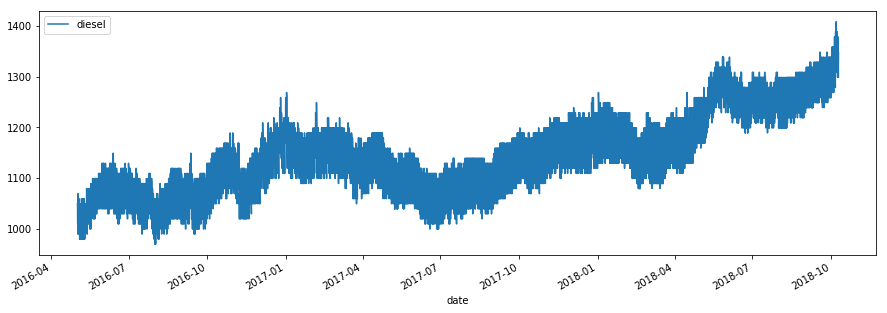

In [24]:
ts.plot(figsize=(15,5))

In [25]:
print(ts.index[0],ts.index[-1])

2016-05-02 06:17:00 2018-10-09 18:53:00


In [26]:
mid=pd.date_range(ts.index[0],ts.index[-1],freq="H",normalize=True)
mid

DatetimeIndex(['2016-05-02 00:00:00', '2016-05-02 01:00:00',
               '2016-05-02 02:00:00', '2016-05-02 03:00:00',
               '2016-05-02 04:00:00', '2016-05-02 05:00:00',
               '2016-05-02 06:00:00', '2016-05-02 07:00:00',
               '2016-05-02 08:00:00', '2016-05-02 09:00:00',
               ...
               '2018-10-08 15:00:00', '2018-10-08 16:00:00',
               '2018-10-08 17:00:00', '2018-10-08 18:00:00',
               '2018-10-08 19:00:00', '2018-10-08 20:00:00',
               '2018-10-08 21:00:00', '2018-10-08 22:00:00',
               '2018-10-08 23:00:00', '2018-10-09 00:00:00'],
              dtype='datetime64[ns]', length=21361, freq='H')

In [27]:
new_index=mid.union(ts.index)


In [28]:
upsampled_data=ts.reindex(new_index)

In [29]:
upsampled_data.head(20)

,diesel
2016-05-02 00:00:00,NaN
2016-05-02 01:00:00,NaN
2016-05-02 02:00:00,NaN
2016-05-02 03:00:00,NaN
2016-05-02 04:00:00,NaN
2016-05-02 05:00:00,NaN
2016-05-02 06:00:00,NaN
2016-05-02 06:17:00,1049.0
2016-05-02 07:00:00,NaN
2016-05-02 08:00:00,NaN


In [30]:
upsampled_data.isnull()


,diesel
2016-05-02 00:00:00,True
2016-05-02 01:00:00,True
2016-05-02 02:00:00,True
2016-05-02 03:00:00,True
2016-05-02 04:00:00,True
2016-05-02 05:00:00,True
2016-05-02 06:00:00,True
2016-05-02 06:17:00,False
2016-05-02 07:00:00,True
2016-05-02 08:00:00,True


In [31]:
upsampled_data = upsampled_data.interpolate(method="time")

upsampled_data.head(100)

,diesel
2016-05-02 00:00:00,NaN
2016-05-02 01:00:00,NaN
2016-05-02 02:00:00,NaN
2016-05-02 03:00:00,NaN
2016-05-02 04:00:00,NaN
2016-05-02 05:00:00,NaN
2016-05-02 06:00:00,NaN
2016-05-02 06:17:00,1049.000000
2016-05-02 07:00:00,1043.136364
2016-05-02 08:00:00,1034.954545


In [32]:
df=upsampled_data
df.head()

,diesel
2016-05-02 00:00:00,NaN
2016-05-02 01:00:00,NaN
2016-05-02 02:00:00,NaN
2016-05-02 03:00:00,NaN
2016-05-02 04:00:00,NaN


In [33]:
df.isnull()

,diesel
2016-05-02 00:00:00,True
2016-05-02 01:00:00,True
2016-05-02 02:00:00,True
2016-05-02 03:00:00,True
2016-05-02 04:00:00,True
2016-05-02 05:00:00,True
2016-05-02 06:00:00,True
2016-05-02 06:17:00,False
2016-05-02 07:00:00,False
2016-05-02 08:00:00,False


In [34]:
df=df.dropna()

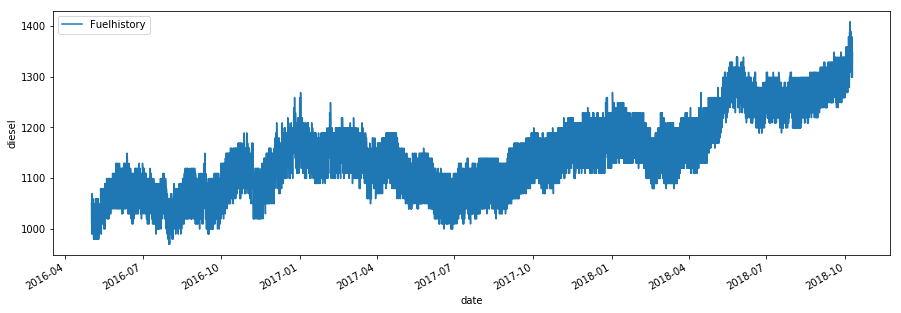

In [35]:
my_plot=df.plot(kind='line',figsize=(15,5))
my_plot.set_xlabel("date")
my_plot.set_ylabel("diesel")
my_plot.legend(["Fuelhistory"])


In [36]:
df.head(20)

,diesel
2016-05-02 06:17:00,1049.000000
2016-05-02 07:00:00,1043.136364
2016-05-02 08:00:00,1034.954545
2016-05-02 09:00:00,1026.772727
2016-05-02 09:57:00,1019.000000
2016-05-02 10:00:00,1018.722222
2016-05-02 11:00:00,1013.166667
2016-05-02 11:45:00,1009.000000
2016-05-02 12:00:00,1014.769231
2016-05-02 12:37:00,1029.000000


In [37]:
# Cast to int using .astype()
df.diesel = df.diesel.astype(int)

C:\Users\Bibek\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [38]:
df.head(20)

,diesel
2016-05-02 06:17:00,1049
2016-05-02 07:00:00,1043
2016-05-02 08:00:00,1034
2016-05-02 09:00:00,1026
2016-05-02 09:57:00,1019
2016-05-02 10:00:00,1018
2016-05-02 11:00:00,1013
2016-05-02 11:45:00,1009
2016-05-02 12:00:00,1014
2016-05-02 12:37:00,1029


In [39]:
df.describe()

,diesel
count,33420.000000
mean,1142.818073
std,73.942017
min,969.000000
25%,1089.000000
50%,1136.000000
75%,1189.000000
max,1409.000000


In [40]:
tf=df['diesel']
tf.head(20)

2016-05-02 06:17:00    1049
2016-05-02 07:00:00    1043
2016-05-02 08:00:00    1034
2016-05-02 09:00:00    1026
2016-05-02 09:57:00    1019
2016-05-02 10:00:00    1018
2016-05-02 11:00:00    1013
2016-05-02 11:45:00    1009
2016-05-02 12:00:00    1014
2016-05-02 12:37:00    1029
2016-05-02 13:00:00    1024
2016-05-02 14:00:00    1012
2016-05-02 14:17:00    1009
2016-05-02 15:00:00    1004
2016-05-02 15:45:00     999
2016-05-02 16:00:00     997
2016-05-02 17:00:00     992
2016-05-02 17:45:00     989
2016-05-02 18:00:00     992
2016-05-02 19:00:00    1007
Name: diesel, dtype: int32

In [41]:
#Checking the stationery of time series


from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  if __name__ == '__main__':


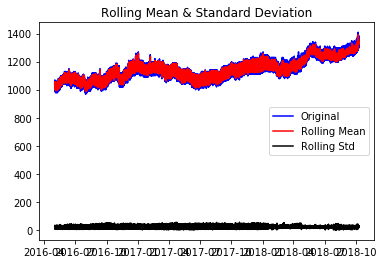

Results of Dickey-Fuller Test:
Test Statistic                    -1.901682
p-value                            0.331270
#Lags Used                        52.000000
Number of Observations Used    33367.000000
Critical Value (1%)               -3.430546
Critical Value (5%)               -2.861627
Critical Value (10%)              -2.566816
dtype: float64


In [42]:
test_stationarity(tf)